# Nama : Muhammad Iffandi
# Nim : 2209106006
# Praktikum : Kecerdasan Buatan A1

# A. Supervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Import Library Yang Dibutuhkan Untuk Melakukan Regresi Liniear

In [2]:
df = pd.read_csv("nintendo3ds.csv")
df.head()

,Unnamed: 0,slug,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,updated,tags,reviews_count,genres,yet,owned,beaten,toplay,dropped,playing
0,0,terraria,12,5/16/2011,4.41,4,1384,6,7304,81.0,...,2020-12-07T19:51:06,"Singleplayer, Steam Achievements",1395,"Platformer, Indie",237,5518,603,94,729,123
1,1,lego-lord-of-the-rings,3,9/28/2012,3.40,4,409,1,3640,80.0,...,2019-10-23T14:56:48,"Singleplayer, Для одного игрока",410,"Casual, Platformer",265,3000,205,29,115,26
2,2,minecraft,26,5/10/2009,4.41,5,1339,8,3640,83.0,...,2020-09-08T16:50:31,"Multiplayer, Sandbox",1359,"Action, Arcade",38,2049,689,48,434,382
3,3,the-binding-of-isaac-rebirth,35,11/4/2014,4.31,5,726,5,3297,86.0,...,2019-12-29T20:04:49,"Singleplayer, Для одного игрока",732,"Action, RPG",74,2464,380,63,225,91
4,4,lego-the-hobbit,2,4/8/2014,3.40,4,289,0,3194,70.0,...,2019-10-23T14:56:45,"Singleplayer, Для одного игрока",289,"Family, Adventure",285,2665,132,24,75,13


## Untuk membaca dataset dan menampilkan 5 data pertama dalam dataset

In [3]:
X = df[['rating_top', 'playtime']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melakukan split data dengan rasio 80:20

# A1. Linear Regression

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 1. lr = LinearRegression(): Ini adalah langkah pertama dalam mempersiapkan model regresi linear. membuat objek model regresi linear dengan variabel lr.
### 2. lr.fit(X_train, y_train): Setelah objek model lr dibuat, menggunakan metode .fit(X_train, y_train) untuk melatih model pada data pelatihan. Di sini, X_train adalah matriks fitur (fitur numerik dari data pelatihan) dan y_train adalah vektor target (nilai yang ingin diprediksi).

In [5]:
y_pred = lr.predict(X_test)

### Digunakan untuk melakukan prediksi pada data pengujian (X_test) dengan model regresi linear yang telah dilatih sebelumnya (lr)

# A2. Hasil Prediksi

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 0.12175425366346462
MSE: 0.11336077923464066
RMSE: 0.33669092538207895
R2-Score: 0.9567942731968149


### Kesimpulannya adalah bahwa model regresi linear yang saya baut cukup baik dalam memprediksi nilai target pada data pengujian. Model ini mampu menjelaskan sebagian besar variasi dalam data (R2-Score yang tinggi), dan kesalahan prediksi yang dihasilkan (MAE, MSE, dan RMSE yang rendah) cukup kecil. 

# A3. Scatter Plot perbandingan antara target asli dan prediksi

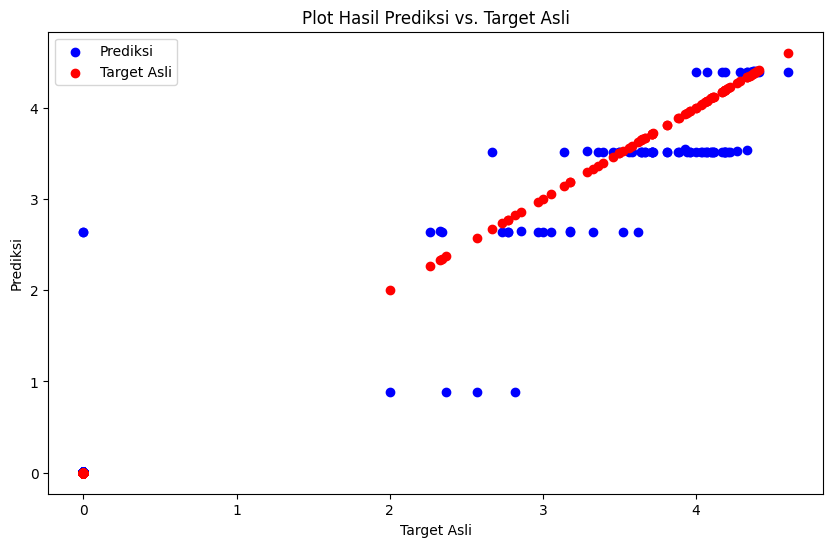

In [7]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi', marker='o')  # Warna biru untuk prediksi
plt.scatter(y_test, y_test, color='red', label='Target Asli', marker='o')  # Warna merah untuk target asli
plt.xlabel('Target Asli')
plt.ylabel('Prediksi')
plt.title('Plot Hasil Prediksi vs. Target Asli')
plt.legend()
plt.show()


# B. Unsupervised Learning

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

### Import library yang akan digunakan untuk melakukan K-Means Clustering

In [9]:
X = df[['rating', 'rating_top']]

km = KMeans(n_clusters=10, n_init = 10, random_state=0)
km.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=0)

### 1. X = df[['rating', 'rating_top']]: Variabel X yang berisi dua kolom dari DataFrame df, yaitu 'rating' dan 'rating_top'. Ini adalah kolom yang akan digunakan sebagai fitur untuk proses clustering.

### 2. km = KMeans(n_clusters=10, n_init=10, random_state=0): digunakan untuk menyimpan objek Kmeans kedalam variabel km.

### 3. km.fit(X): digunakan untuk mengajarkan model K-Means kepada data kita yang diwakili oleh variabel X.

In [10]:
predicted_labels = km.predict(X)

silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

calinski_score = calinski_harabasz_score(X, predicted_labels)
print(f"Calinski-Harabasz Score: {calinski_score}")

davies_bouldin = davies_bouldin_score(X, predicted_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.9130753686984197
Calinski-Harabasz Score: 114336.395530263
Davies-Bouldin Index: 0.37918677547288704


### Kesimpulannya, hasil clustering yang dihasilkan oleh model K-Means pada data yang saya buat sangat baik. Nilai-nilai metrik evaluasi menunjukkan bahwa pengelompokan sangat padat, terpisah, dan dekat satu sama lain. Ini adalah tanda bahwa algoritma K-Means telah berhasil dalam mengelompokkan data menjadi 10 klaster yang relevan.

In [11]:
true_labels = df['rating_top']

ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
completeness = completeness_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")

Adjusted Rand Index: 0.9580810885815525
Normalized Mutual Information: 0.8656926462621117
Homogeneity: 0.9831350678776615
Completeness: 0.7733147430954642


### Kesimpulannya, hasil clustering yang di hasilkan dengan model K-Means sangat baik dan sangat sesuai dengan label asli. Nilai-nilai metrik evaluasi yang tinggi menunjukkan bahwa pengelompokan yang dilakukan memiliki tingkat kesesuaian yang tinggi dengan kelas asli dalam data, serta klaster yang sangat homogen dalam hal label. Namun, nilai completeness yang lebih rendah menunjukkan bahwa ada beberapa sampel yang mungkin tidak sepenuhnya sesuai dengan klaster kelas asli.

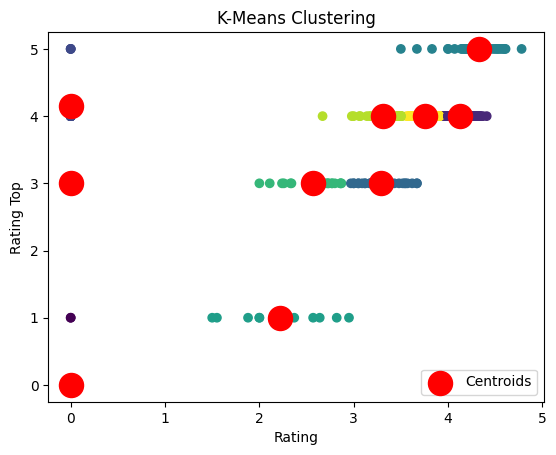

In [15]:
plt.scatter(X['rating'], X['rating_top'], c=km.labels_, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Rating")
plt.ylabel("Rating Top")
plt.legend()
plt.show()